# Heart disease prediction with decision tree classification

## B.M.A.Viraj Bulugahapitiya

## Student ID: 23081013

In [52]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Improting the dataset
data = "C:/Users/amant/OneDrive/Desktop/UH MSc In DS/Machine Learning/Assignment/heart.csv"
df = pd.read_csv(data)

Explanatory Data Analysis (EDA)

In [9]:
# view dimensions of dataset
df.shape

(1025, 14)

In [11]:
# preview the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
#Summary of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
#Finding any null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# Find duplicate rows based on all columns:
duplicates_all = df[df.duplicated()]
print("Duplicate Rows (all columns):\n", duplicates_all)

#Count the number of duplicate rows:
num_duplicates_all = df.duplicated().sum()
print("\nNumber of Duplicate Rows (all columns):", num_duplicates_all)

# Remove duplicate rows:
df1 = df.drop_duplicates()
print("\nDataFrame without duplicates (all columns):\n", df1)

Duplicate Rows (all columns):
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2 

Demographic Analysis

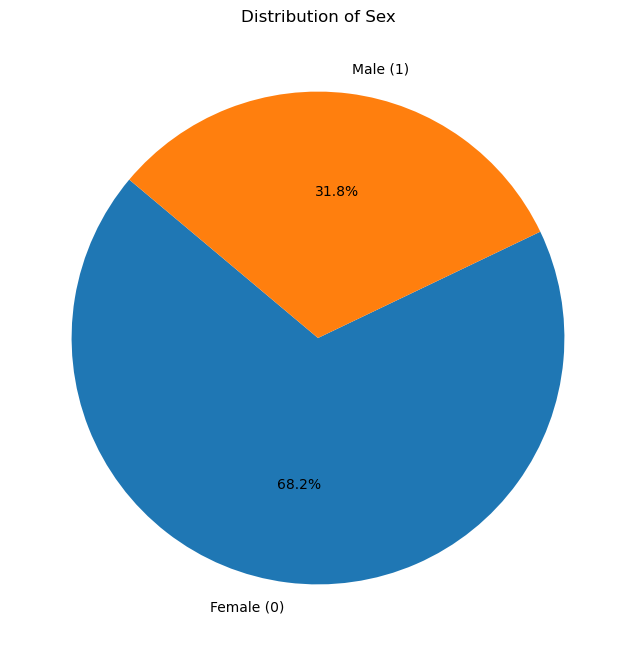

In [21]:
#Distribution of Sex
sex_counts = df1['sex'].value_counts()

labels = ['Female (0)', 'Male (1)']

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

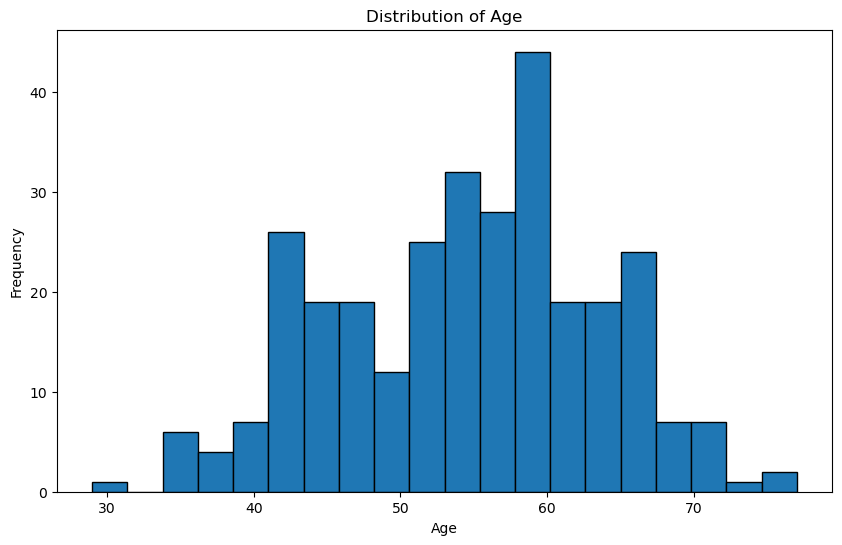

In [23]:
#Age Distributution
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['age'], bins=20, edgecolor='black')  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

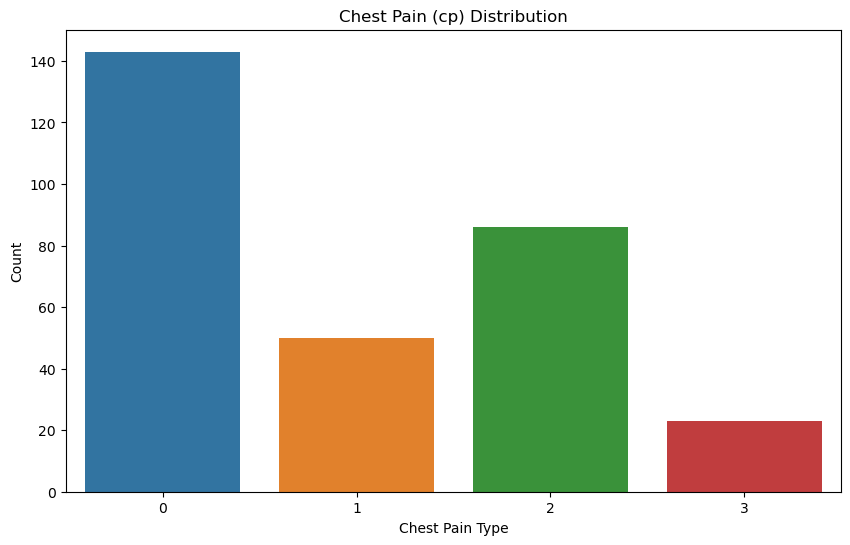

In [25]:
#Different chest pain types
# Count the occurrences of each chest pain category
cp_counts = df1['cp'].value_counts().sort_index()  

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cp_counts.index, y=cp_counts.values)  
plt.title('Chest Pain (cp) Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(cp_counts.index) 
plt.show()

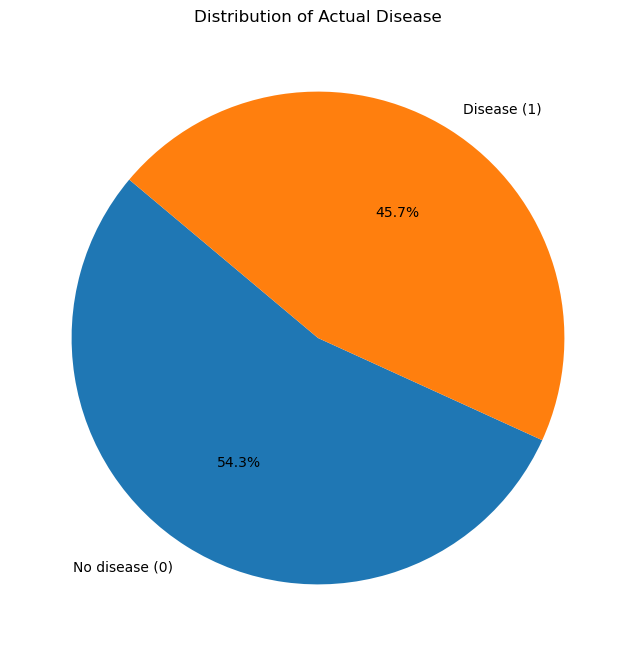

In [27]:
#Heart disease of the patients
disease_counts = df1['target'].value_counts()

labels = ['No disease (0)', 'Disease (1)']

plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Actual Disease')
plt.ylabel('')
plt.show()

Declare feature vector and target variable

In [29]:
#declaring feature vector and target variable
X = df1.drop(['target'], axis=1)

y = df1['target']

Training and Test Set

In [31]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((202, 13), (100, 13))

Decision Tree Classifier with criterion gini index

In [35]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [39]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7600


Compare the train-set and test-set accuracy

In [43]:
#Training set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8663


Check for overfitting and underfitting

In [45]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8663
Test set score: 0.7600


Reducing the overfitting

In [48]:
#Hyperparameter Tuning with GridSearchCV (Pruning)
param_grid = {
    'max_depth': [3, 5, 7, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None] 
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)

#Best Model and Evaluation
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('Tuned Training set score: {:.4f}'.format(best_clf.score(X_train, y_train)))
print('Tuned Test set score: {:.4f}'.format(best_clf.score(X_test, y_test)))

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Training set score: 0.8614
Tuned Test set score: 0.7600


In [49]:
#Feature Importance 
if hasattr(best_clf, 'feature_importances_'):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_clf.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print('\nFeature Importance:\n', feature_importance)


Feature Importance:
      Feature  Importance
9    oldpeak    0.363388
11        ca    0.182031
2         cp    0.140368
7    thalach    0.095292
12      thal    0.084832
3   trestbps    0.074536
0        age    0.039141
4       chol    0.014449
10     slope    0.005963
1        sex    0.000000
5        fbs    0.000000
6    restecg    0.000000
8      exang    0.000000


Visualizing the Dicision Tree

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.49\nsamples = 202\nvalue = [87, 115]'),
 Text(0.25, 0.625, 'x[9] <= 0.7\ngini = 0.378\nsamples = 87\nvalue = [65, 22]'),
 Text(0.125, 0.375, 'x[11] <= 0.5\ngini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.0625, 0.125, 'gini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.1875, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.375, 0.375, 'x[3] <= 107.0\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(0.75, 0.625, 'x[9] <= 1.95\ngini = 0.309\nsamples = 115\nvalue = [22, 93]'),
 Text(0.625, 0.375, 'x[0] <= 55.5\ngini = 0.245\nsamples = 105\nvalue = [15, 90]'),
 Text(0.5625, 0.125, 'gini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.6875, 0.125, 'gini = 0.405\nsamples = 46\nvalue = [13, 33]'),
 Text(0.875, 0.375, 'x[12] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.8125, 0

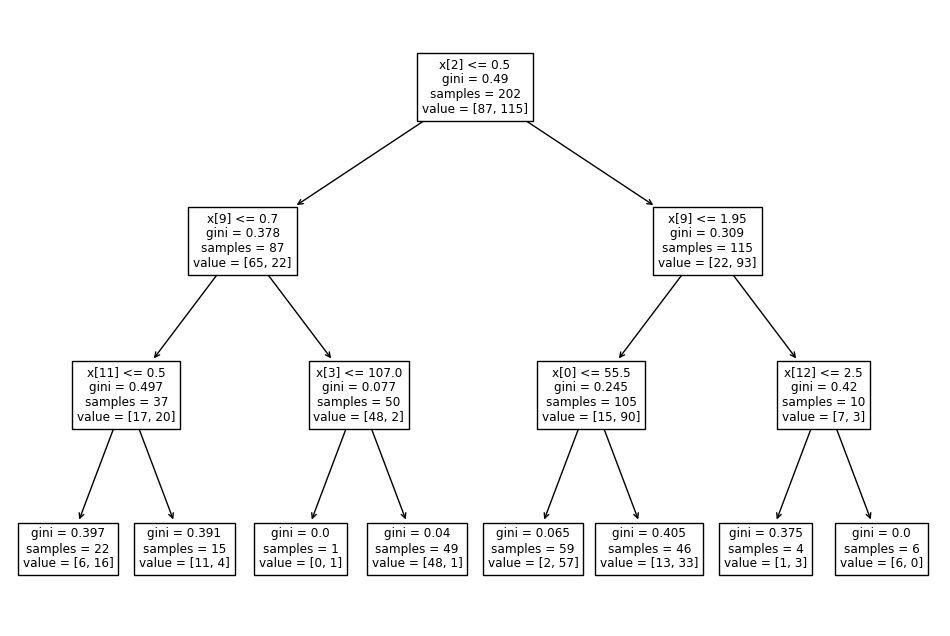

In [50]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[36 15]
 [ 9 40]]


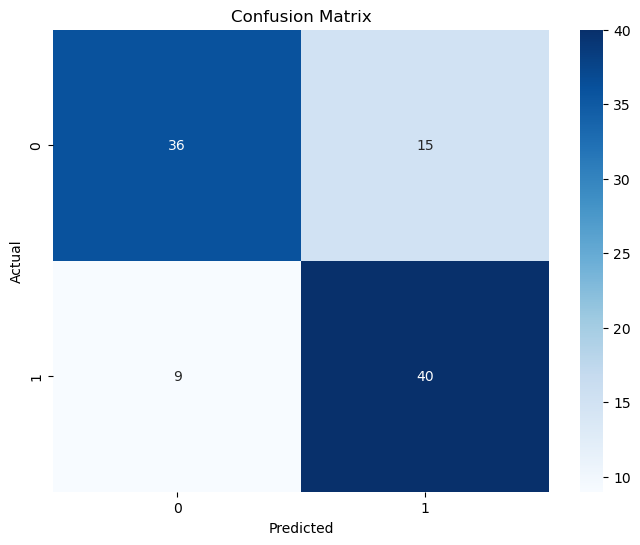

In [54]:
#Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        51
           1       0.73      0.82      0.77        49

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

